In [1]:
# 필요 패키지 호출 및 데이터 다운로드
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import numpy as np

In [2]:
# MNIST 데이터 불러오기
mnist_train = dataset.MNIST(root = './MNIST_data', train = True,
                            transform = transforms.ToTensor(),
                            download = True)

mnist_test = dataset.MNIST(root = './MNIST_data', train = False,
                           transform = transforms.ToTensor(),
                           download = True)

레이블(숫자): 5


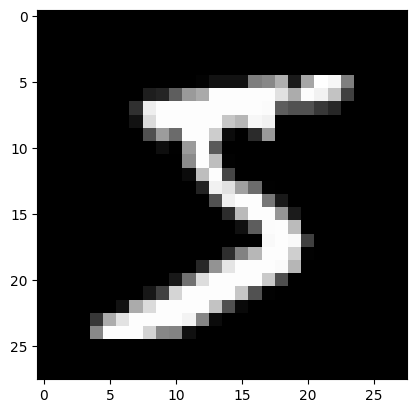

In [3]:
# sample
import matplotlib.pyplot as plt

img, label = mnist_train[0]             # 1
plt.imshow(img[0,:,:], cmap = 'gray')   # 2
print(f'레이블(숫자): {label}')         # 3

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 32,
                                          shuffle = True, drop_last = False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 32,
                                          shuffle = False, drop_last = False)

In [5]:
data_batch, label_batch = next(iter(train_loader))
print(f'데이터 배치: {data_batch.shape}')
print(f'레이블 배치: {label_batch.shape}')

데이터 배치: torch.Size([32, 1, 28, 28])
레이블 배치: torch.Size([32])


In [18]:
# 인공 신경망 모델 생성

class MNIST_full(nn.Module):
  def __init__(self):
    super(MNIST_full, self).__init__()
    self.lin1 = nn.Linear(784,256)
    self.lin2 = nn.Linear(256,128)
    self.lin3 = nn.Linear(128,10)
  def forward(self, x):
    x = x.view(-1, 784)
    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.softmax(self.lin3(x), dim = 1)
    return x

In [19]:
model = MNIST_full()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [20]:
# 목적함수 정의

criterion = nn.CrossEntropyLoss()

In [21]:
# 학습

for epoch in range(3):
  print(f'Epoch: {epoch + 1}')
  loss_buffer = []
  for idx, (x, y) in enumerate(train_loader):
    y_onehot = torch.zeros((y.shape[0],10))
    y_onehot[range(y.shape[0]),y] = 1

    y_infer = model(x)
    loss = criterion(y_infer, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_buffer.append(loss.item())
    if idx % 600 == 0:
      print(f'Iteration:{idx} Train loss {np.mean(loss_buffer):.3f}')

Epoch: 1
Iteration:0 Train loss 2.303
Iteration:600 Train loss 1.638
Iteration:1200 Train loss 1.590
Iteration:1800 Train loss 1.570
Epoch: 2
Iteration:0 Train loss 1.568
Iteration:600 Train loss 1.515
Iteration:1200 Train loss 1.512
Iteration:1800 Train loss 1.511
Epoch: 3
Iteration:0 Train loss 1.471
Iteration:600 Train loss 1.500
Iteration:1200 Train loss 1.501
Iteration:1800 Train loss 1.500


In [23]:
# 시험용 데이터 정확도 측정

acc = []
for x,y in test_loader:
  y_infer = model(x)
  correct_prediction = torch.argmax(y_infer, 1) == y
  acc.append(correct_prediction.float().mean())
print(f'Test loss {np.mean(loss_buffer):f}, Accuracy: {np.mean(acc)*100:f}%')

Test loss 1.499834, Accuracy: 96.815097%


실제 이미지의 숫자 4
예측 이미지의 숫자 tensor([4])


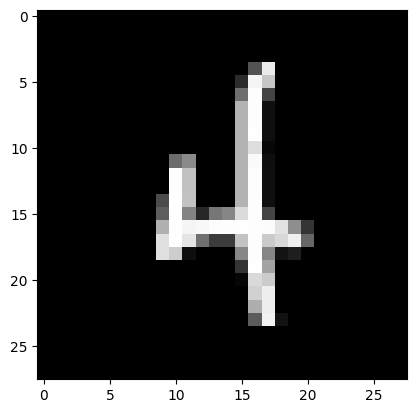

In [36]:
# 단일 데이터에 대한 평가

import random

img, label = random.choice(mnist_test)
y_infer = model(img)
print(f'실제 이미지의 숫자 {label}')
print(f'예측 이미지의 숫자 {torch.argmax(y_infer,1)}')
plt.imshow(img[0,:,:],cmap='gray')

실제 이미지의 숫자 2
예측 이미지의 숫자 2


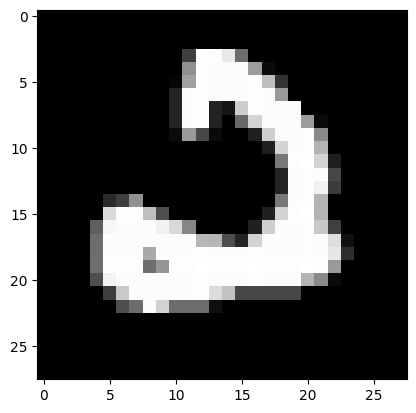

실제 이미지의 숫자 2
예측 이미지의 숫자 2


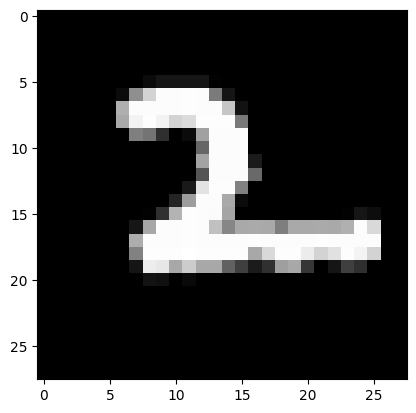

실제 이미지의 숫자 8
예측 이미지의 숫자 8


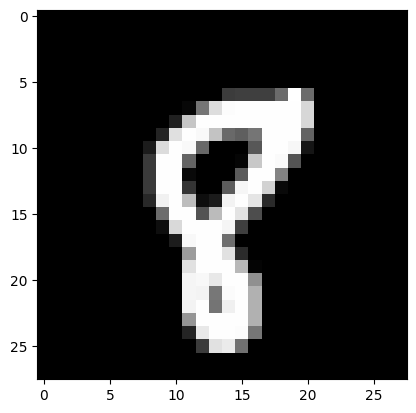

실제 이미지의 숫자 7
예측 이미지의 숫자 7


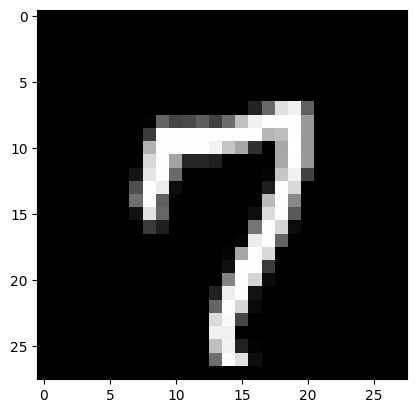

실제 이미지의 숫자 9
예측 이미지의 숫자 9


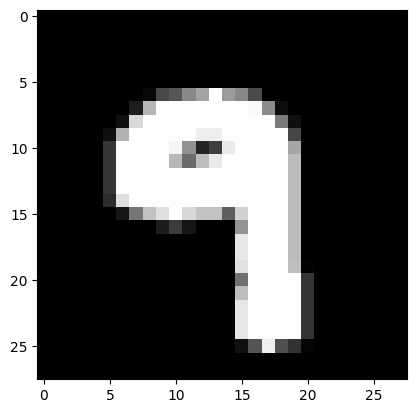

In [37]:
# 반복문을 활용하여 여러 데이터 확인하기

num_images_to_visualize = 5

for _ in range(num_images_to_visualize):
    img, label = random.choice(mnist_test)
    y_infer = model(img)
    predicted_label = torch.argmax(y_infer, 1).item()
    print(f'실제 이미지의 숫자 {label}')
    print(f'예측 이미지의 숫자 {predicted_label}')
    plt.imshow(img[0, :, :], cmap='gray')
    plt.show()